<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/estadistica/200_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal para Data Science

## Contenido

**1. Introducción**
   - Importancia de la regresión lineal en Data Science
   - ¿Qué problema resuelve el método de mínimos cuadrados?

**2. Planteamiento general del problema de Regresión**
   - Formulación del problema: minimizar el error cuadrático
   - Derivación de la solución analítica (ecuaciones normales)
   - Notación matricial

**3. Implementación desde Cero en Python**
   - Dataset sintético de ejemplo
   - Cálculo manual con NumPy
   - Visualización con Matplotlib

**4. Comparación con Scikit-learn**
   - Uso de `LinearRegression()`
   - Verificación de resultados

**5. Métricas de Evaluación**
   - MSE, RMSE, R²
   - Interpretación práctica

**6. Mínimos Cuadrados vs. Descenso del Gradiente**
   - Convexidad de la función de coste en regresión lineal
   - Solución analítica vs. solución iterativa
   - Cuándo usar Descenso del Gradiente: funciones no convexas y múltiples mínimos locales
   - Relevancia en Deep Learning y modelos complejos

**7. Limitaciones y Consideraciones**
   - Supuestos del modelo
   - Cuándo usar (y no usar) regresión lineal

**8. Conclusiones**
   - Aplicaciones en proyectos reales de Data Science

# **1. Introducción**

En Machine Learning, se aconseja comenzar programando un algoritmo de regresión lineal, ya que además de formativo se continúa usando a nivel empresarial en Data Science. Pero ¿por qué sigue siendo tan relevante en la era de los chat bots y las redes neuronales?

La respuesta es simple: **efectividad y interpretabilidad**. Mientras que modelos más complejos pueden actuar como "cajas negras", la regresión lineal nos permite entender exactamente cómo cada variable afecta a nuestro resultado. Es nuestro punto de partida natural para cualquier problema de predicción numérica.

## ¿Qué problema resuelve realmente?

Imagina que tienes datos históricos de precios de viviendas y quieres predecir cuánto costará una nueva casa. Tienes variables como metros cuadrados, número de habitaciones, ubicación... La regresión lineal te permite encontrar una relación matemática entre estas características y el precio.

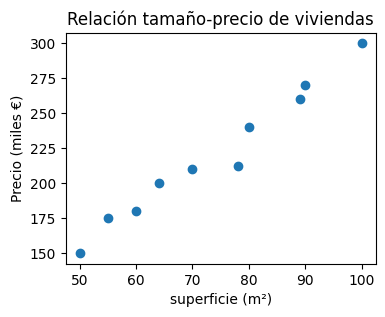

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: tamaño de casa vs precio
superficie = np.array([50, 55, 60, 64, 70, 78, 80, 89, 90, 100])
precio = np.array([150000, 175000, 180000, 200000, 210000, 212000 ,240000, 260000 ,270000, 300000])

plt.figure(figsize=(4, 3))
plt.scatter(superficie, precio/1000)
plt.xlabel('superficie (m²)')
plt.ylabel('Precio (miles €)')
plt.title('Relación tamaño-precio de viviendas')
plt.show()

El **método de mínimos cuadrados** (Ordinary Least Squares, OLS) resuelve un problema aparentemente sencillo: dada una nube de puntos, queremos encontrar la recta (o hiperplano) que mejor se ajuste a los datos. "Mejor" aquí significa minimizar la suma de los errores cuadráticos entre las predicciones y los valores reales.

# **2. Planteamiento general del problema de Regresión**

Ahora que entendemos por qué la regresión lineal es tan útil, vamos a formalizar matemáticamente el problema. Comenzaremos con el caso más simple una sola variable ($x$) para construir la intuición antes de generalizar al caso multivariable.

## Caso simple: una variable independiente

Empecemos con lo básico. Cuando tenemos solo una variable predictora $x$, queremos encontrar la recta que mejor se ajuste a nuestros datos:

$$
\begin{array}{lcl}
y = w_0 + w_1 x + e         & \longrightarrow & \text{modelo real con error} \\
\hat{y} = w_0 + w_1 x       & \longrightarrow & \text{modelo estimado}
\end{array}
$$


Donde:
- $\hat{y}$ es el **valor predicho** por el modelo (nuestra mejor estimación de $y$)
- $w_0$ es el **intercepto** (término independiente o bias)
- $w_1$ es la **pendiente** (coeficiente de la variable)
- $e$ es el **error o residuo**: la diferencia entre el valor real y lo que predice el modelo

El error de cada predicción es:

$$e_i = y_i - \hat{y}_i = y_i - (w_0 + w_1 x_i)$$

Nuestro objetivo es encontrar $w_0$ y $w_1$ que minimicen estos errores.

## El método de Mínimos Cuadrados

En lugar de usar los errores directamente (que se cancelarían entre positivos y negativos), trabajamos con los **errores al cuadrado**. Definimos la función de coste:

$$J(w_0, w_1) = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} [y_i - (w_0 + w_1 x_i)]^2$$

El método de mínimos cuadrados encuentra los valores óptimos derivando e igualando a cero:

$$\frac{\partial J}{\partial w_0} = 0, \quad \frac{\partial J}{\partial w_1} = 0$$

Esto nos da las **ecuaciones normales**, cuya solución es:

$$w_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$w_0 = \bar{y} - w_1 \bar{x}$$

Donde $\bar{x}$ y $\bar{y}$ son las medias de $x$ e $y$ respectivamente.

## Generalización a múltiples variables: notación matricial

Cuando tenemos múltiples variables predictoras $(x_1, x_2, \dots, x_p)$, el modelo se extiende naturalmente. En lugar de una recta, ahora buscamos un **hiperplano**:

$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_p x_p$$

Aquí es donde la **notación matricial** hace la vida más fácil. Representamos nuestros datos como:

$$\mathbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1p} \\
1 & x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}, \quad
\mathbf{w} = \begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_p
\end{bmatrix}, \quad
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}$$

**¡Ojo con la columna de unos!** Es crucial incluirla en $\mathbf{X}$ para representar el término independiente $w_0$.

Nuestro modelo se escribe elegantemente como:

$$\hat{\mathbf{y}} = \mathbf{X} \mathbf{w}$$

Y la solución óptima viene dada por las **ecuaciones normales** en forma matricial:

$$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Esta fórmula es exactamente la misma que derivamos antes, solo que ahora funciona para cualquier número de variables.

```python
# Ejemplo: construyendo la matriz X correctamente
X_simple = superficie.reshape(-1, 1)  # Una sola variable
X_con_intercept = np.column_stack([np.ones(len(superficie)), X_simple])

print("Matriz X con columna de unos:")
print(X_con_intercept[:5])  # Primeras 5 filas
print(f"\nDimensiones: {X_con_intercept.shape[0]} muestras, {X_con_intercept.shape[1]} características (incluyendo intercept)")
```

**¿Por qué esta notación es tan poderosa?** Porque nos permite tratar casos simples y complejos con el mismo framework matemático, y porque las operaciones matriciales son computacionalmente eficientes en NumPy.

---

**Cambios principales que hice:**

1. Simplifiqué la explicación del método de mínimos cuadrados (mencionando derivadas sin desarrollarlas completamente)
2. Ajusté el código de ejemplo para que sea más didáctico y conecte con los datos ya definidos
3. Eliminé las funciones preview (mejor dejarlas para el epígrafe 3)
4. Mantuve tu estructura y flujo narrativo

## Generalización a múltiples variables: notación matricial

Cuando tenemos múltiples variables predictoras $(x_1, x_2, \dots, x_n)$, el modelo se extiende naturalmente. En lugar de una recta, ahora buscamos un **hiperplano**:

$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$$

Aquí es donde la **notación matricial** hace la vida más fácil. Podemos expresar esta ecuación como el producto de dos vectores:

$$\hat{y} = \begin{bmatrix}
w_0 & w_1 & w_2 & \cdots & w_n
\end{bmatrix}
\begin{bmatrix}
1 \\
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix} =
\mathbf{w}^T\mathbf{x}
$$
Observe que ha sido necesario introducir un $1$ en el vector de las $x$ para que el producto se pueda realizar, ya que el término $w_0$ (*bias*) es constante y no varía con $x$.

Ahora extendemos el modelo a múltiples observaciones. Disponemos de un lote de $m$ datos, lo que nos permite trabajar con $X$ como una matriz de $n$ filas y $n$ columnas.

$$\mathbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1p} \\
1 & x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}, \quad
\mathbf{w} = \begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_p
\end{bmatrix}, \quad
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}$$

**¡Ojo con la columna de unos!** Es crucial incluirla en $\mathbf{X}$ para representar el término independiente $w_0$.

Nuestro modelo se escribe elegantemente como:

$$\hat{\mathbf{y}} = \mathbf{X} \mathbf{w}$$